# 一元高次函数方式拟合（3次）

In [ ]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class calculate():
  def __init__(self):
    self.data_size = 2000
    self.training_count = 5000
    self.weight_dimension = 4
    self.learning_rate = 1e-6
    self.dtype = torch.float64
    self.display_rate = 500
    self.__init_data()

  def start_execute(self):
    self.target_value = self.target_function(self.value_x)
    # import pdb; pdb.set_trace()
    for i in range(self.training_count):
      self.predict_value = self.predict_funciton(self.value_x)
      loss = (self.target_value - self.predict_value).pow(2).sum()
      if (i+1) % self.display_rate == 0 :
        print('loss is %20s '%loss.item())
      loss.backward()
      with torch.no_grad():
        for each_dim in range(self.weight_dimension):
          self.weight_array[each_dim] -= self.learning_rate * self.weight_array[each_dim].grad
          self.weight_array[each_dim].grad = None

  def target_function(self, value_x):
    return torch.sin(value_x)

  def predict_funciton(self, value_x):
    value_y_array = [self.weight_array[i]*value_x.pow(i) for i in range(self.weight_dimension)]
    value_y = np.array(value_y_array).sum(axis=0)
    return value_y

  def __init_data(self):
    try:
      self.device = torch.device('cuda')
    except:
      self.device = torch.device('cpu'); print('----warning : using cpu instead of cuda-----')
    
    self.weight_array = [torch.randn((), dtype=self.dtype, device=self.device, requires_grad=True) for _ in range(self.weight_dimension)]
    self.value_x = torch.linspace(-math.pi, math.pi, self.data_size, dtype=self.dtype, device=self.device)



代码中自动计算梯度后，每次更新然后将梯度清空，主要是说梯度会叠加的。这样，下一次计算就是重新计算梯度了

https://www.zhihu.com/question/303070254/answer/608153308

In [ ]:
test_demo = calculate()
test_demo.start_execute()

loss is   19.084248721710814 
loss is   10.427839741856321 
loss is    9.076280287787458 
loss is    8.859770617287362 
loss is    8.824299182374848 
loss is    8.818377397544257 
loss is    8.817373666840462 
loss is    8.817201504890516 
loss is    8.817171706407022 
loss is    8.817166513590962 


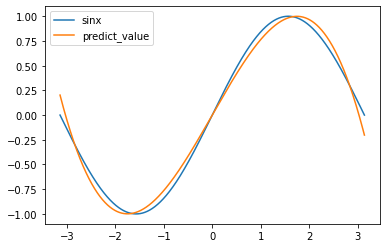

In [ ]:
plt.plot(test_demo.value_x.tolist(), test_demo.target_value.tolist())
plt.plot(test_demo.value_x.tolist(), test_demo.predict_value.tolist())
plt.legend(['sinx', 'predict_value'])

# 其它多项式拟合方案
 y=a+bP3(c+dx)

 P3(x)=1/2 * (5x^3−3x) 

In [ ]:
class legend_p3(torch.autograd.Function):
  @staticmethod
  def forward(ctx, input):
    ctx.save_for_backward(input)
    return 0.5 * ( 5*input**3 - 3*input)

  @staticmethod
  def backward(ctx, grad_output):
    input, = ctx.saved_tensors
    return grad_output * 0.5 * (15*input**2 - 3)


In [ ]:
class calculate():
  def __init__(self):
    self.data_size = 2000
    self.training_count = 5000
   
    self.learning_rate = 1e-6
    self.dtype = torch.float64
    self.display_rate = 500
    self.__init_data()

  def start_execute(self):
    self.target_value = self.target_function(self.value_x)
    # import pdb; pdb.set_trace()
    for i in range(self.training_count):
      self.predict_value = self.predict_funciton(self.value_x)
      loss = (self.target_value - self.predict_value).pow(2).sum()
      if (i+1) % self.display_rate == 0 :
        print('loss is %20s '%loss.item())
      loss.backward()
      with torch.no_grad():
        for each_dim in range(4):
          self.weight_array[each_dim] -= self.learning_rate * self.weight_array[each_dim].grad
          self.weight_array[each_dim].grad = None

  def target_function(self, value_x):
    return torch.sin(value_x)

  def predict_funciton(self, value_x):
    value_y = self.weight_a + self.weight_b * self.function_p3(self.weight_c + self.weight_d*value_x)
    return value_y

  def __init_data(self):
    try:
      self.device = torch.device('cuda')
    except:
      self.device = torch.device('cpu'); print('----warning : using cpu instead of cuda-----')
    self.weight_a = torch.full((), 0,  device=self.device, dtype=self.dtype, requires_grad=True)
    self.weight_b = torch.full((), -1, device=self.device, dtype=self.dtype, requires_grad=True)
    self.weight_c = torch.full((), 0,  device=self.device, dtype=self.dtype, requires_grad=True)
    self.weight_d = torch.full((), 0,device=self.device, dtype=self.dtype, requires_grad=True)
    self.weight_array = [self.weight_a, self.weight_b, self.weight_c, self.weight_d]

    self.function_p3 = legend_p3.apply
    self.value_x = torch.linspace(-math.pi, math.pi, self.data_size, dtype=self.dtype, device=self.device)


In [ ]:
test_demo1 = calculate()
test_demo1.start_execute()

loss is   213.50994069404237 
loss is   147.09033539227252 
loss is   102.36960118798154 
loss is    72.18081091023686 
loss is   51.766570276881154 
loss is   37.945546045983605 
loss is    28.58032385411164 
loss is    22.23041158497721 
loss is    17.92295531278915 
loss is   14.999953223655254 


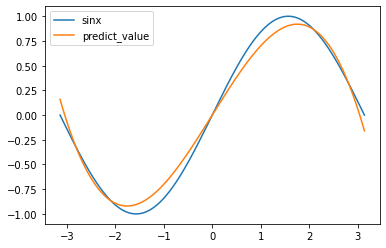

In [ ]:
plt.plot(test_demo1.value_x.tolist(), test_demo1.target_value.tolist())
plt.plot(test_demo1.value_x.tolist(), test_demo1.predict_value.tolist())
plt.legend(['sinx', 'predict_value'])